## Observations and Insights 

1. Based on the mean and median values of the Tumor Volumes in mice per drug regimen we can infer the that the only  drug that performed better than Capomulin was Ramicane. Other than that all other drugs have higher mean tumor volume present in mice which indicates that their performance is weaker than Capomulin. 

2. If we compare the spread of Capomulin and Ramicanes performance based on the box plots plotted we can infer that the final tumor volumes in mice treated with Capomulin are negatively skewed compared the ones treated with Ramicane which is more positively skewed. This indicates most of final tumor volumes in mice treated with Ramicane are spread towards the lower end where as for mice treated with Capomulin most of the tumor volumes are spread towards the higher end. This shows that Ramicane's performance is better than Capomulin

3. When looking at the treatment on a mouse with Capomulin we can see that the affects of the drug does not kick in right away it takes the drug about 20 days to start showing results from 20 to 35 days is when the affects of Capomulin significantly start showing i.e the tumor volume numbers start falling.

4. When looking at the Capomulin treatment data and evaluating the relationship between the weight of mice and the average tumor volume using the correlation coefficent of 0.85 and the slope of the linear regression it can be inferred that weight and average tumor volume have a strong relationship. A heavier mouse tends to have more tumor volume present even when undergoing treatement.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(pd.unique(combined_df['Mouse ID']))

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_df.drop(combined_df[combined_df["Mouse ID"] == 'g989'].index, inplace = False)
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_study_data['Mouse ID']))

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_drugregime_df = clean_study_data.groupby(["Drug Regimen"])

Mean = grouped_drugregime_df["Tumor Volume (mm3)"].mean()
Median = grouped_drugregime_df["Tumor Volume (mm3)"].median()
Var =grouped_drugregime_df["Tumor Volume (mm3)"].var()
SD = grouped_drugregime_df["Tumor Volume (mm3)"].std()
SEM = grouped_drugregime_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
Summary_df = pd.DataFrame({"Mean": Mean,"Median": Median, "Variance":Var, "Standard Deviation":SD, "SEM": SEM})
Summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

SingleLime_summary= grouped_drugregime_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
SingleLime_summary

C:\Users\yamee\AppData\Local\Temp\ipykernel_26768\542002258.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  SingleLime_summary= grouped_drugregime_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Mice Tested for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

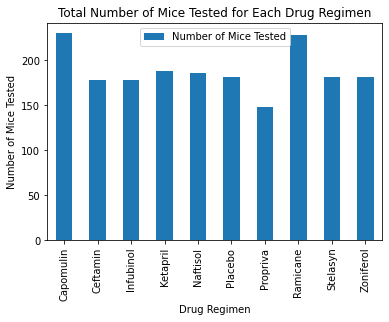

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Using Grouped data per Drug Regimen to get the Time Point count 
Total_timepoints =grouped_drugregime_df["Timepoint"].count()

#Creating a Dataframe to store data for Bar plot
Barplot_df = pd.DataFrame({"Number of Mice Tested":Total_timepoints})

#Plotting the Barplot using Pandas
Bar_plot = Barplot_df.plot.bar(y= 'Number of Mice Tested',rot=90)
Bar_plot.set_xlabel("Drug Regimen")
Bar_plot.set_ylabel("Number of Mice Tested")
Bar_plot.set_title("Total Number of Mice Tested for Each Drug Regimen")
Bar_plot

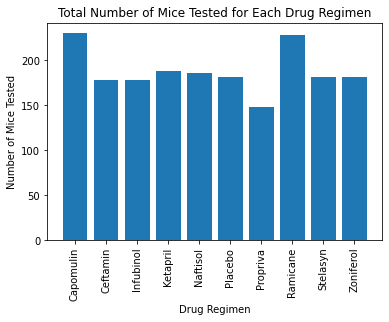

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Generating indexed data set for pyplot:
#Creating an indexed groupby Drug regimen and getting a timepoint count
Grouped_Indexed_data = clean_study_data.groupby(["Drug Regimen"], as_index= False)
Totaltimepoints_pyplot = Grouped_Indexed_data["Timepoint"].count()


#Setting x and y axis
BP_xaxis = Totaltimepoints_pyplot["Drug Regimen"]
BP_yaxis = Totaltimepoints_pyplot["Timepoint"]

#Creating and formatting Bargraph using pyplot
plt.bar(BP_xaxis,BP_yaxis)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested for Each Drug Regimen")
plt.show()



<AxesSubplot:title={'center':'Gender Distribution of Mice'}, ylabel='Sex'>

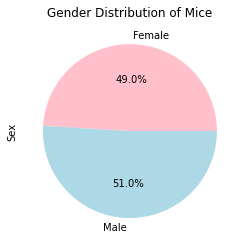

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Creating a dataset grouped by gender using groupby 
Gender_gby = clean_study_data.groupby(["Sex"])

#Storing Gender count for plotting pie charch
Gender_count = Gender_gby["Sex"].count()

#Setting labels and colours

colors = ['pink', 'lightblue']

#Plotting Pie Chart that shows distribution of male and female mic
Pie_plot = Gender_count.plot.pie(y='Sex',autopct="%1.1f%%", colors=colors)
Pie_plot.set_title("Gender Distribution of Mice")
Pie_plot.set_ylabel("Sex")
Pie_plot


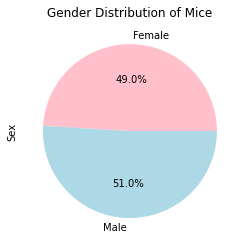

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Generating indexed data set for pyplot:
#Creating an indexed groupby Sex and getting a count
GenderIndexed_gby = clean_study_data.groupby(["Sex"], as_index=False)

GenderCount_pyplot = GenderIndexed_gby["Mouse ID"].count()

#Setting labels and sizes of pie plot
labels = GenderCount_pyplot["Sex"]
sizes = GenderCount_pyplot["Mouse ID"]

#Generating and formatting a pie plot to show distribution of male vs female mice 
#tested using pyplot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%' )
ax.set_ylabel("Sex")
ax.set_title("Gender Distribution of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [15]:
#Sorting Data based on Timepoints to get the highest timepoint for each mouse
Sorted_clean_studydata = clean_study_data.sort_values(by=['Timepoint'],ascending=False)

#Extracting Greatest timepoint data to get the final tumor volume for each mouse
Greatest_Timepoint_df = Sorted_clean_studydata.drop_duplicates(subset='Mouse ID',keep='first')
Greatest_Timepoint_df.set_index("Mouse ID")



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z969,Naftisol,Male,9,30,45,73.867845,4
p136,Zoniferol,Female,5,28,45,63.488697,2
g296,Zoniferol,Female,14,29,45,68.163195,4
g497,Ketapril,Male,19,28,45,69.872251,2
g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...
u153,Ceftamin,Female,11,25,0,45.000000,0
t573,Ceftamin,Female,15,27,0,45.000000,0
h428,Ketapril,Female,1,27,0,45.000000,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes using for loop
for t in Treatment_list:
     T1 = Greatest_Timepoint_df.loc[Greatest_Timepoint_df["Drug Regimen"] == Treatment_list[0]]
     T2 = Greatest_Timepoint_df.loc[Greatest_Timepoint_df["Drug Regimen"] == Treatment_list[1]]
     T3 = Greatest_Timepoint_df.loc[Greatest_Timepoint_df["Drug Regimen"] == Treatment_list[2]]
     T4 = Greatest_Timepoint_df.loc[Greatest_Timepoint_df["Drug Regimen"] == Treatment_list[3]]

#Appending Tumor Volume Data to list of each treatment
Capomulin = T1["Tumor Volume (mm3)"].tolist()
Ramicane = T2["Tumor Volume (mm3)"].tolist()
Infubinol = T3["Tumor Volume (mm3)"].tolist()
Ceftamin = T4["Tumor Volume (mm3)"].tolist()
    

# Calculating Quartiles, IQR and quantitatively determining if there are any potential outliers

In [18]:
#Capomulin Quartiles
quartilesT1 = T1["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqT1 = quartilesT1[0.25]
upperqT1 = quartilesT1[0.75]
iqrT1 = upperqT1-lowerqT1

#Capomulin Upper and Lower bounds 
lower_boundT1 = lowerqT1 - (1.5*iqrT1)
upper_boundT1 = upperqT1 + (1.5*iqrT1)

print(f'The Lower Quartile of Tumor Volumes in mice treated by Capomulin is {lowerqT1}.')
print(f'The Upper Quartile of Tumor Volumes in mice treated by Capomulin is {upperqT1}.')
print(f'The inter quartile range of Tumor Volumes in mice treated by Capomulin is {iqrT1}.')
print(f'The Outliers in Capomulin data set would lie above {upper_boundT1} (upper bound) and below {lower_boundT1}(lower bound)')

#Using a for loop and an if statement to look for outliers
for t1value in Capomulin:
    if (t1value < lower_boundT1) | (t1value > upper_boundT1):
        print(f'Outliers: {t1value}')
    


The Lower Quartile of Tumor Volumes in mice treated by Capomulin is 32.37735684.
The Upper Quartile of Tumor Volumes in mice treated by Capomulin is 40.1592203.
The inter quartile range of Tumor Volumes in mice treated by Capomulin is 7.781863460000004.
The Outliers in Capomulin data set would lie above 51.83201549 (upper bound) and below 20.70456164999999(lower bound)


In [19]:
#Ramicane Quartiles
quartilesT2 = T2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqT2 = quartilesT2[0.25]
upperqT2 = quartilesT2[0.75]
iqrT2 = upperqT2-lowerqT2

#Ramicane Upper and Lower bounds
lower_boundT2 = lowerqT2 - (1.5*iqrT2)
upper_boundT2 = upperqT2 + (1.5*iqrT2)

print(f'The Lower Quartile of Tumor Volumes in mice treated by Ramicane is {lowerqT2}.')
print(f'The Upper Quartile of Tumor Volumes in mice treated by Ramicane is {upperqT2}.')
print(f'The inter quartile range of Tumor Volumes in mice treated by Ramicane is {iqrT2}.')
print(f'The Outliers in Ramicane data set would lie above {upper_boundT2} (upper bound) and below {lower_boundT2}(lower bound)')

#Using a for loop and an if statement to look for outliers
for t2value in Ramicane:
    if (t2value < lower_boundT2) | (t2value > upper_boundT2):
        print(f'Outliers: {t2value}')

The Lower Quartile of Tumor Volumes in mice treated by Ramicane is 31.56046955.
The Upper Quartile of Tumor Volumes in mice treated by Ramicane is 40.65900627.
The inter quartile range of Tumor Volumes in mice treated by Ramicane is 9.098536719999998.
The Outliers in Ramicane data set would lie above 54.30681135 (upper bound) and below 17.912664470000003(lower bound)


In [20]:
#Infubinol Quartiles
quartilesT3 = T3["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqT3 = quartilesT3[0.25]
upperqT3 = quartilesT3[0.75]
iqrT3 = upperqT3-lowerqT3


#Infubinol Upper and Lower bounds 
lower_boundT3 = lowerqT3 - (1.5*iqrT3)
upper_boundT3 = upperqT3 + (1.5*iqrT3)

print(f'The Lower Quartile of Tumor Volumes in mice treated by Infubinol is {lowerqT3}.')
print(f'The Upper Quartile of Tumor Volumes in mice treated by Infubinol is {upperqT3}.')
print(f'The inter quartile range of Tumor Volumes in mice treated by Infubinol is {iqrT3}.')
print(f'The Outliers in Infubinol data set would lie above {upper_boundT3} (upper bound) and below {lower_boundT3}(lower bound)')

#Using a for loop and an if statement to look for outliers
for t3value in Infubinol:
    if (t3value < lower_boundT3) | (t3value > upper_boundT3):
        print(f'Outliers:{t3value}')

The Lower Quartile of Tumor Volumes in mice treated by Infubinol is 54.04860769.
The Upper Quartile of Tumor Volumes in mice treated by Infubinol is 65.52574285.
The inter quartile range of Tumor Volumes in mice treated by Infubinol is 11.477135160000003.
The Outliers in Infubinol data set would lie above 82.74144559000001 (upper bound) and below 36.83290494999999(lower bound)
Outliers:36.3213458


In [21]:
#Ceftamin Quartiles
quartilesT4 = T4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqT4 = quartilesT4[0.25]
upperqT4 = quartilesT4[0.75]
iqrT4 = upperqT4-lowerqT4


#Infubinol Upper and Lower bounds 
lower_boundT4 = lowerqT4 - (1.5*iqrT4)
upper_boundT4 = upperqT4 + (1.5*iqrT4)

print(f'The Lower Quartile of Tumor Volumes in mice treated by Ceftamin is {lowerqT4}.')
print(f'The Upper Quartile of Tumor Volumes in mice treated by Ceftamin is {upperqT4}.')
print(f'The inter quartile range of Tumor Volumes in mice treated by Ceftamin is {iqrT4}.')
print(f'The Outliers in Ceftamin data set would lie above {upper_boundT4} (upper bound) and below {lower_boundT4}(lower bound)')

#Using a for loop and an if statement to look for outliers
for t4value in Ceftamin:
    if (t4value < lower_boundT4) | (t4value > upper_boundT4):
        print(f'Outliers:{t4value}')

The Lower Quartile of Tumor Volumes in mice treated by Ceftamin is 48.72207785.
The Upper Quartile of Tumor Volumes in mice treated by Ceftamin is 64.29983003.
The inter quartile range of Tumor Volumes in mice treated by Ceftamin is 15.577752179999997.
The Outliers in Ceftamin data set would lie above 87.66645829999999 (upper bound) and below 25.355449580000002(lower bound)


# Box Plot
    

C:\Users\yamee\AppData\Local\Temp\ipykernel_26768\1694913920.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Tumor_Volumes.keys())


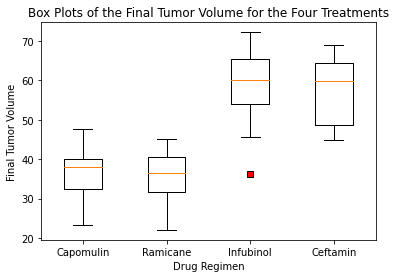

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volumes = {"Capomulin":Capomulin,"Ramicane":Ramicane, "Infubinol":Infubinol, "Ceftamin":Ceftamin}

fig1, ax1 = plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')

ax1.set_xticklabels(Tumor_Volumes.keys())
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.set_title("Box Plots of the Final Tumor Volume for the Four Treatments")
ax1.boxplot(Tumor_Volumes.values(), flierprops=red_square)
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Pulling out Capomulin Data from the main data frame
Capomulin_data = clean_study_data.loc[clean_study_data["Drug Regimen"] == Treatment_list[0]]

#Pulling out Data for Mouse l509 (mouse treated for capomulin)
Mouse_l509_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == 'l509']

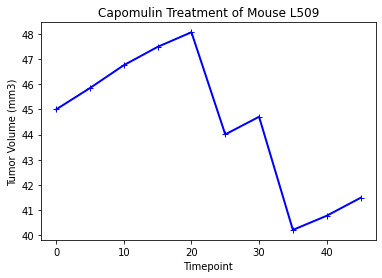

In [24]:
#Generating a line plot for the data pulled above

#Setting axis
x_axis = Mouse_l509_data["Timepoint"]
y_axis = Mouse_l509_data["Tumor Volume (mm3)"]

#Plotting and labeling the line plot
plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=2)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Grouping Data per mouse ID to get the mean weight and mean tumor volume per mouse
Groupby_Mouse = Capomulin_data.groupby(["Mouse ID"]).mean()


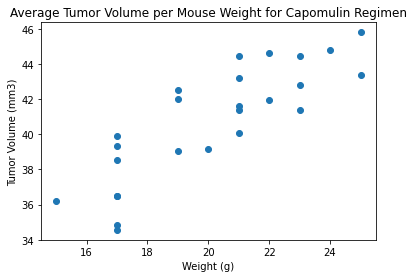

In [26]:
#Setting axis
sx_axis = Groupby_Mouse["Weight (g)"]
sy_axis = Groupby_Mouse["Tumor Volume (mm3)"]

#Plotting and labeling the line plot
plt.scatter(sx_axis, sy_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
title = "Average Tumor Volume per Mouse Weight for Capomulin Regimen"
plt.title(title)
plt.show()

## Correlation and Regression

The correlation between average mouse weight and average tumor volume for the Capomulin regimen is 0.84
linear regression model : y = 0.95x + 21.55


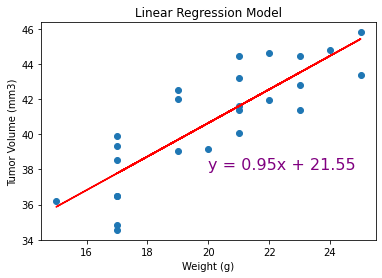

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation coefficent
correlation = st.pearsonr(sx_axis, sy_axis)
print(f"The correlation between average mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_axis, sy_axis)
plt.scatter(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(sx_axis,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=16,color="purple")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression Model")


plt.show()